In [1]:
from tqdm import tqdm
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import partial


In [2]:
from bingo import *
from graph import *
from counting import *
from latex import *
from parallel import *

In [3]:
RUNS = 5_000_000
DECKS=[1,2,3,4,5,10,15,20,25,30,35,40]
palette = colorblind_palette(len(DECKS))

In [4]:
np.random.seed(56734)

In [5]:
%%time

df_jokers_3_5 = quick_deck_matches_on(RUNS, decks=DECKS, accept_jokers=True, early_stop=3, discard=5)
df_jokers_3_5.head()


CPU times: user 282 ms, sys: 713 ms, total: 994 ms
Wall time: 6min 19s


,Deck count,Results,Successes,N,Probability
0,1,0 -1 1 -1 2 -1 3 ...,797646,5000000,15.95292
1,2,0 -1 1 -1 2 7 3 ...,1467576,5000000,29.35152
2,3,0 5 1 7 2 6 3 ...,2029087,5000000,40.58174
3,4,0 6 1 5 2 5 3 ...,2503909,5000000,50.07818
4,5,0 5 1 6 2 7 3 ...,2902308,5000000,58.04616


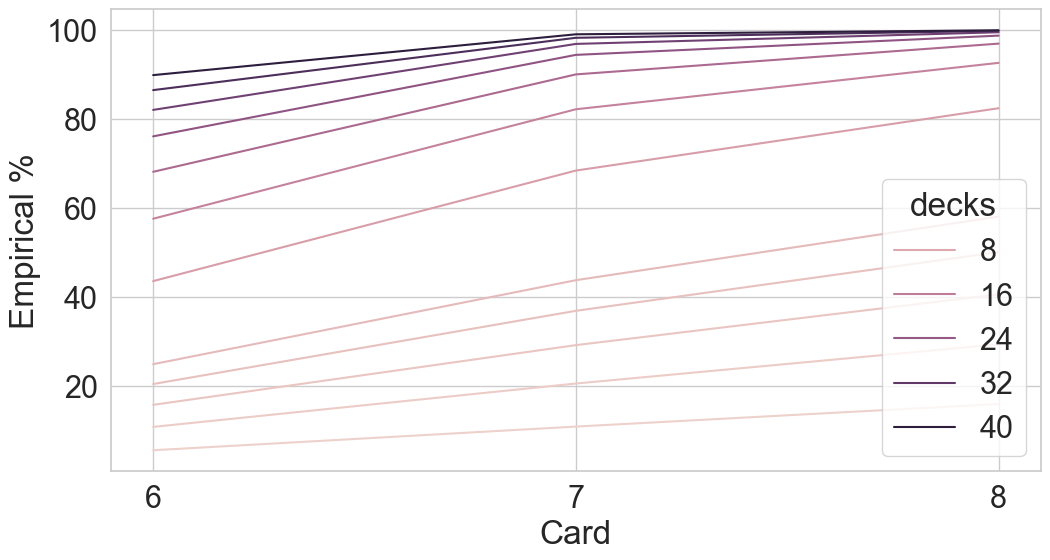

In [6]:
ax, data_3_5 = print_cumulative(df_jokers_3_5, True, xticks=[6, 7, 8])

In [7]:
for i, (decks, card, values) in data_3_5.query("card==8").iterrows():
    print(decks, card, values, confidence(values * RUNS / 100, RUNS))

1.0 8.0 15.95292 (0.15920850044946427, 0.15985042273118386)
2.0 8.0 29.35152 (0.2931162072561196, 0.29391451003643954)
3.0 8.0 40.58174 (0.40538704863359143, 0.4062478960910479)
4.0 8.0 50.07817999999999 (0.5003435307798534, 0.5012200680188023)
5.0 8.0 58.04616 (0.5800289810121088, 0.5808940953474733)
10.0 8.0 82.38784000000001 (0.8235442569445381, 0.8242120453713399)
15.0 8.0 92.57748 (0.9255446994914062, 0.9260042462465078)
20.0 8.0 96.90216000000001 (0.968869370917101, 0.9691731083661015)
25.0 8.0 98.6988 (0.986888290917575, 0.9870869607577595)
30.0 8.0 99.45542 (0.9944893105493255, 0.9946183294994926)
35.0 8.0 99.76872 (0.997644710544544, 0.9977289246899845)
40.0 8.0 99.90476 (0.9990201759080982, 0.999074257235987)


In [8]:
prob_table_to_latex(partial_card_to_prob(data_3_5.query("card==8"), RUNS), name="the-naturally-ocurring-bingo-miracle3-5")

\begin{table}[tb]
\label{tbl:the-naturally-ocurring-bingo-miracle3-5}
\begin{tabular}{llll}
\toprule
 & Probability & CI lower & CI upper \\
Decks &  &  &  \\
\midrule
1 & 15.953% & 15.921% & 15.985% \\
2 & 29.352% & 29.312% & 29.391% \\
3 & 40.582% & 40.539% & 40.625% \\
4 & 50.078% & 50.034% & 50.122% \\
5 & 58.046% & 58.003% & 58.089% \\
10 & 82.388% & 82.354% & 82.421% \\
15 & 92.577% & 92.554% & 92.600% \\
20 & 96.902% & 96.887% & 96.917% \\
25 & 98.699% & 98.689% & 98.709% \\
30 & 99.455% & 99.449% & 99.462% \\
35 & 99.769% & 99.764% & 99.773% \\
40 & 99.905% & 99.902% & 99.907% \\
\bottomrule
\end{tabular}
\end{table}

